<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyXbmDYqjlTzvXPRBryziHvyhLx_7NurzioTPZBLujXUmM4nYzgSO29y4SNG5AvTB1P-Q&usqp=CAU"/>

## Sustainable and Entrepreneurial Finance - Group 15
- El Maliki Soukaynah
- Poretti Massimo
- Scalabrin Dario
- Trapanese Filippo

In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting, expected_returns, risk_models
import warnings
from statistics import mean
import investpy
from scipy.stats.stats import pearsonr 
from itertools import accumulate

# Import old homework
import H1

#%matplotlib notebook

# Remove warnings
warnings.filterwarnings("ignore")

## Exercise 1

In [3]:
# providing the statistics for the timeseries
df_env_scores_timestamps = H1.df_env_scores["Unnamed: 0"]
df_env_scores = H1.df_env_scores[H1.filtered]
mean = []
median = []
min_ = []
max_ = []
sd = []
for line in range(len(df_env_scores)):
    i = df_env_scores.iloc[line]
    mean.append(i.mean())
    median.append(i.median())
    min_.append(i.min())
    max_.append(i.max())
    sd.append(i.std())

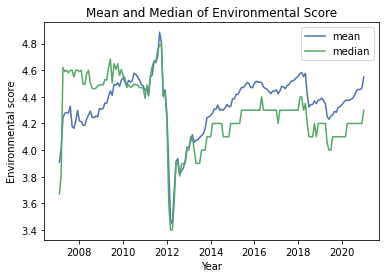

In [4]:
plt.plot(df_env_scores_timestamps, mean, label="mean"), plt.plot(df_env_scores_timestamps,median, label = "median")
plt.xlabel("Year")
plt.ylabel("Environmental score")
plt.title("Mean and Median of Environmental Score")
plt.legend()
plt.show()

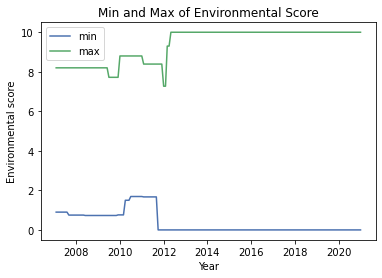

In [5]:
plt.plot(df_env_scores_timestamps, min_, label = "min"), plt.plot(df_env_scores_timestamps,max_, label="max")
plt.xlabel("Year")
plt.ylabel("Environmental score")
plt.title("Min and Max of Environmental Score")
plt.legend()
plt.show()

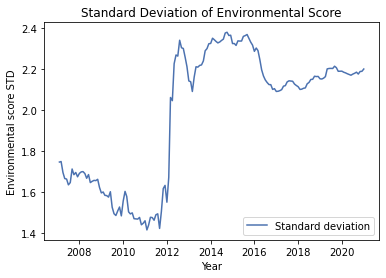

In [6]:
plt.plot(df_env_scores_timestamps, sd, label="Standard deviation")
plt.xlabel("Year")
plt.ylabel("Environmental score STD")
plt.title("Standard Deviation of Environmental Score")
plt.legend()
plt.show()

In [7]:
# Retrieve years from the time
years_list = [df_env_scores_timestamps[line].year for line in range(len(df_env_scores_timestamps))]
# Add the year to the dataframe
df_env_scores["Year"] = years_list
# Compute the mean for each year
df_env_scores_grouped = df_env_scores.groupby(["Year"]).mean()
df_env_scores_grouped

,AEA000201011,AEA001501013,AEA002001013,AED000201015,AED000601016,AED000901010,AED001301012,AED001501017,AEDFXA0M6V00,AEE000301011,...,ZAE000210688,ZAE000216537,ZAE000248498,ZAE000248506,ZAE000255360,ZAE000255915,ZAE000259479,ZAE000259701,ZAE000265971,ZAE000269890
Year,,,,,,,,,,,,,,,,,,,,,
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,2.900000,2.400000,1.700000,1.600000,NaN,5.500000,NaN,NaN,5.800000,5.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,2.400000,2.466667,2.125000,1.300000,NaN,5.916667,NaN,NaN,5.175000,5.525000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# descriptive statistics by each year
dfx = df_env_scores_grouped.T.describe()
dfx.round(2)

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,145.00,177.00,187.00,171.00,144.00,545.00,844.00,895.00,857.00,870.00,910.00,1375.00,1518.00,1541.00
mean,4.11,4.21,4.42,4.53,4.41,4.00,4.16,4.28,4.45,4.48,4.49,4.35,4.32,4.42
std,1.68,1.63,1.53,1.49,1.44,2.09,2.21,2.29,2.27,2.10,2.09,2.11,2.16,2.16
min,0.75,0.73,0.76,1.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.77,3.05,3.32,3.46,3.44,2.41,2.52,2.60,2.86,3.01,3.07,2.94,2.78,2.90
50%,4.40,4.49,4.47,4.47,4.47,4.00,4.01,4.18,4.30,4.37,4.28,4.15,4.11,4.20
75%,5.22,5.36,5.51,5.67,5.38,5.50,5.70,5.69,5.82,5.93,5.90,5.70,5.67,5.77
max,8.20,8.20,8.80,8.80,8.23,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


In [9]:
# graph with country differentiation
df_env_disclosed = df_env_scores_grouped.copy()
for i in df_env_disclosed.columns:
    df_env_disclosed = df_env_disclosed.rename(columns={i: H1.df_names.loc[H1.df_names["ISIN"] == i, 'Country'].iloc[0]})
df_env_disclosed = df_env_disclosed.groupby(df_env_disclosed.columns.str[:2],axis=1).count()

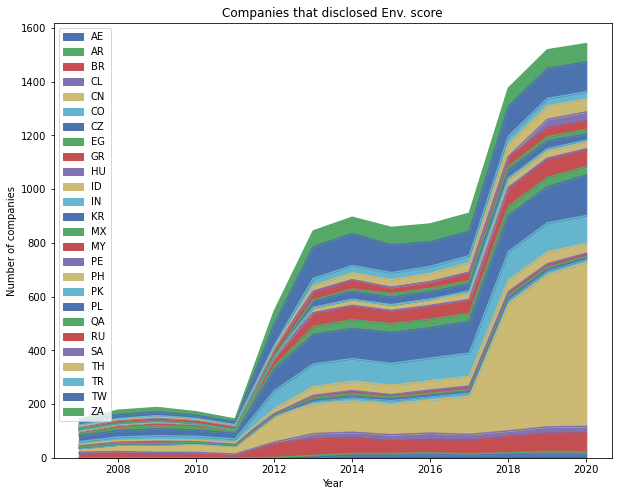

In [10]:
df_env_disclosed.plot.area(title="Companies that disclosed Env. score", figsize=(10,8))
plt.xlabel('Year')
plt.ylabel('Number of companies')
plt.show()

In [11]:
# function for plotting histograms
def bin_plot(data, year):
    n_companies = np.count_nonzero(~np.isnan(data))
    
    colors = ["#B34345", "#CA7678", "#F8D599", "#F5C677", "#F3AB45","#619592", "#34635D"]
    my_bins = list(np.arange(0,11,10/7))
    
    ind = np.array(my_bins[:-1])
    width = np.array([my_bins[i+1]-my_bins[i] for i in range(len(my_bins)-1)])
    
    fig, ax = plt.subplots(figsize=(8,4), facecolor='w')
    cnts, values, bars = ax.hist(data, edgecolor = 'k',  bins = my_bins, range = (1,10))
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(("CCC", "B", "BB", "BBB", "A", "AA", "AAA"))
    ax.set_title("Env. ratings of companies in " + str(year))
    
    ylimit = 0
    
    for bar in bars:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()/n_companies*100
        y_lim = bar.get_height()
        ax.annotate('{:.2f}%'.format(y), (x, y_lim +(0.007*n_companies)), ha='center')
        if y_lim > ylimit:
            ylimit = y_lim
    
               
    for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
        bar.set_facecolor(colors[i % len(colors)])
        
    plt.ylim(0, ylimit*1.1)
    

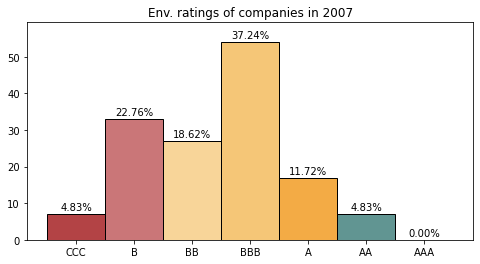

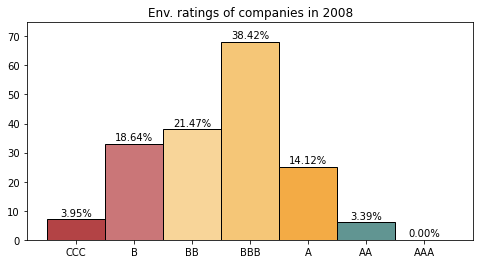

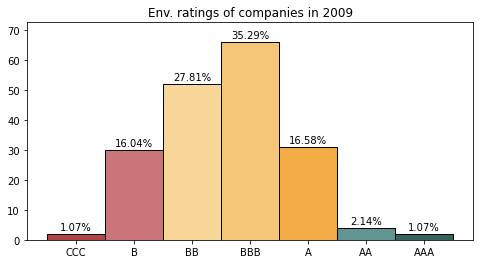

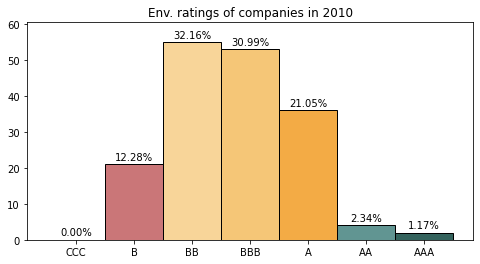

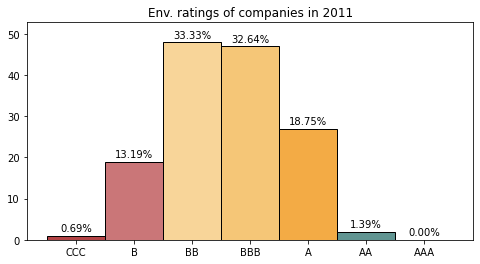

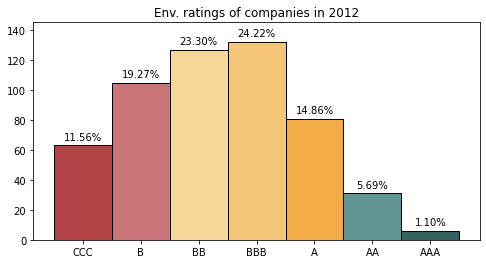

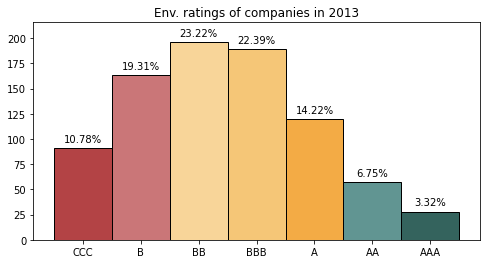

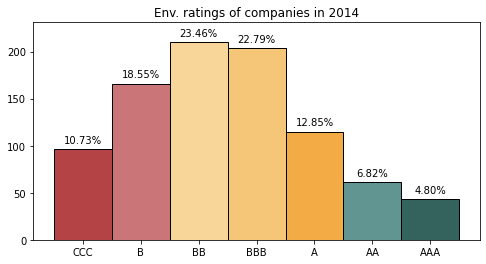

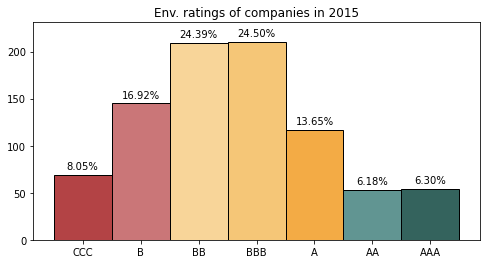

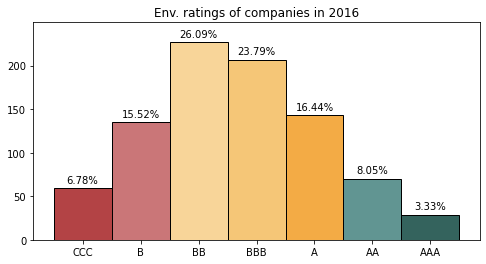

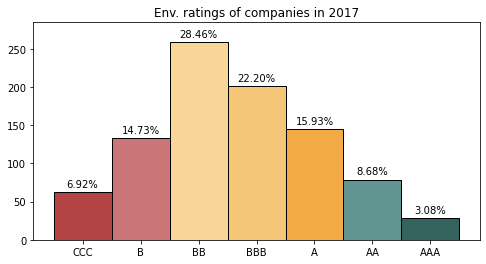

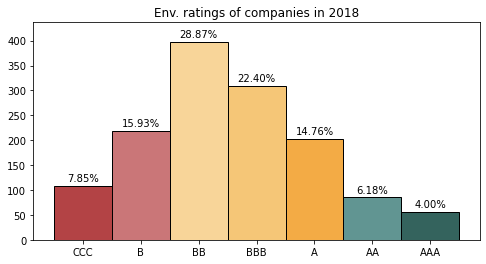

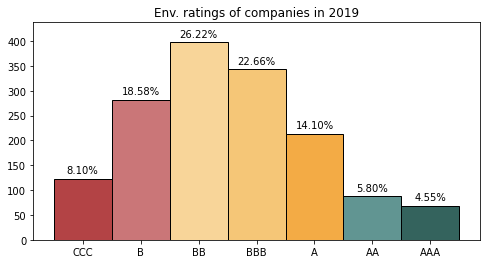

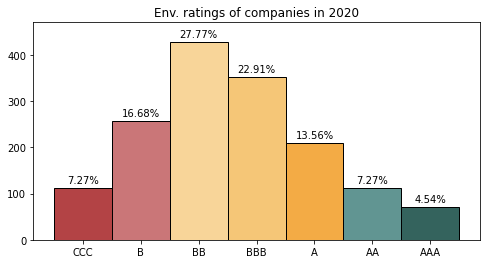

In [12]:
for i in range(2007, 2021):
    bin_plot(list(df_env_scores_grouped.loc[int(i)]), int(i))            

## Exercise 2

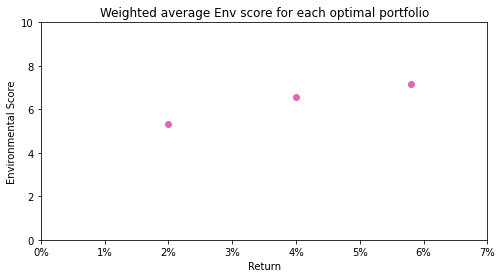

In [13]:
# Covariance between assets
cov = risk_models.CovarianceShrinkage(H1.fifty_random, returns_data = True, frequency = 12).ledoit_wolf()
ef = EfficientFrontier(H1.fifty_random.mean(), cov)
# Different returns of H1
return_port = [0.02, 0.04, 0.058]
volatility_port = []
env_scores_port = []

df_fifty_random_port = {}

for i in return_port:
    weights = ef.efficient_return(i)
    volatility_port.append(ef.portfolio_performance()[1])
    firms = weights.keys()
    firms_weights = weights.values()
    firms_env_scores = df_env_scores.mean()[list(firms)].drop_duplicates()
    
    df_fifty_random_env_score = pd.DataFrame(None)
    df_fifty_random_env_score["Firms"] = list(firms)
    df_fifty_random_env_score["Env Score"] = firms_env_scores.values
    df_fifty_random_env_score["Weights"] = list(firms_weights)
    
    df_fifty_random_port.update({ i : df_fifty_random_env_score})
    
    port_env_score = np.average(firms_env_scores.values, weights = list(firms_weights))
    env_scores_port.append(port_env_score)

fig = plt.figure(20, (8,4))
ax = fig.add_subplot(1,1,1)
plt.title("Weighted average Env score for each optimal portfolio")
plt.xlabel("Return")
plt.ylabel("Environmental Score")
plt.ylim(0, 10)
plt.xlim(0, 7)
plt.scatter([0.02*100, 0.04*100, 0.058*100], env_scores_port, color = "#E067B2")

fmt = '%.f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.show()

In [14]:
def port_stat_fifty_random(r):  
    port = df_fifty_random_port[r].sort_values(["Env Score", "Weights"], ascending = [True, False])
    port = port[port.Weights != 0]
    port_top10 = port.head(len(port)//2)
    port_top10_c = []
    port_top10_n = []

    for i in port_top10.Firms:
        try:
            company_info = investpy.stocks.search_stocks(by = "isin", value = i)
            port_top10_c.append(company_info.country[0])
            port_top10_n.append(company_info.full_name[0])

        except RuntimeError:
            port_top10_c.append("Not Found")
            port_top10_n.append("Not Found")

    port_top10["Full Name"] = port_top10_n
    port_top10["Country"] = port_top10_c
    
    port_top10 = port_top10.append(port_top10.sum(numeric_only = True), ignore_index = True)
    
    port_top10.at[len(port_top10)-1,"Firms"] = "**TOTAL**"
    
    return port_top10

In [15]:
# First Portfolio
port_stat_fifty_random(return_port[0])

,Firms,Env Score,Weights,Full Name,Country
0,SA0007879089,0.180952,0.028187,The Saudi British Bank,saudi arabia
1,CNE1000033J2,0.834783,0.045059,Huaxi Securities Co Ltd Class A,china
2,CNE000000H20,1.506250,0.001602,Hebei Iron and Steel Co Ltd,china
3,INE522F01014,1.691852,0.023302,Coal India Ltd,india
4,KYG2743Y1061,1.958621,0.176823,Dali Foods Group Co Ltd,hong kong
5,TW0002015005,2.138298,0.020047,Feng Hsin Steel Co Ltd,taiwan
6,TH0101A10Z01,2.379167,0.012113,Charoen Pokphand Foods PCL,thailand
7,ZAE000035861,3.020000,0.030191,Capitec Bank Holdings Ltd,south africa
8,TH0122C10Z04,3.200000,0.027833,KCE Electronics PCL,thailand
9,CNE000001B66,3.287097,0.028490,Jiangsu Yangnong Chemical Co Ltd,china


In [16]:
# Second Portfolio
port_stat_fifty_random(return_port[1])

,Firms,Env Score,Weights,Full Name,Country
0,ZAE000035861,3.020000,0.037310,Capitec Bank Holdings Ltd,south africa
1,TH0122C10Z04,3.200000,0.124501,KCE Electronics PCL,thailand
2,CNE000001B66,3.287097,0.047361,Jiangsu Yangnong Chemical Co Ltd,china
3,CNE100000BJ4,3.462500,0.014695,Zhejiang Dahua Technology Co Ltd,china
4,**TOTAL**,12.969597,0.223866,NaN,NaN


In [17]:
# Third Portfolio
port_stat_fifty_random(return_port[2])

,Firms,Env Score,Weights,Full Name,Country
0,TH0122C10Z04,3.2,0.028727,KCE Electronics PCL,thailand
1,**TOTAL**,3.2,0.028727,NaN,NaN


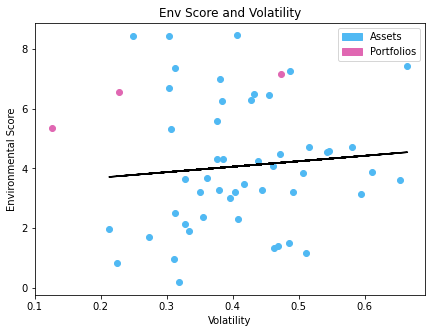

In [18]:
# Generate data
x = np.sqrt(np.diagonal(cov))
y = df_fifty_random_env_score["Env Score"]

# Initialize layout
fig, ax = plt.subplots(figsize = (7, 5))

plt.title("Env Score and Volatility")
plt.xlabel("Volatility")
plt.ylabel("Environmental Score")

# Add scatterplot
ax.scatter(x, y, color = '#50B9F3')
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Plot regression line
ax.plot(x, a + b * x, c = "black", lw = 1.5);
ax.scatter(volatility_port, env_scores_port , c = '#E067B2')

# Plot legend
red_patch = mpatches.Patch(color = '#E067B2', label='Portfolios')
blue_patch = mpatches.Patch(color = '#50B9F3',   label='Assets')
plt.legend(handles=[blue_patch, red_patch])

## Exercise 3

In [19]:
# sample of 50 firms
df_env_scores_fifty_random = df_env_scores[list(firms)]
# dropping duplicated columns
df_env_scores_fifty_random = df_env_scores_fifty_random.loc[:,~df_env_scores_fifty_random.columns.duplicated()]
# df with risk-free rate
df_rf = pd.read_excel(os.path.join(H1.FF, "devrf.xlsx"), header = None, names = ["date", "return"])[-len(df_env_scores_fifty_random):]

# Function to drop for the dataset those assets with last tercile size value
def get_last_tercile(df):
    # Get t-1
    raw = df.iloc[[-2]]
    tercile = df.iloc[-2].quantile(1/3)
    return raw.drop(columns = raw.columns[(raw < tercile).any()]).columns

# lists for statistics
returns_min_var_top_env = []
volatility_min_var_top = []
sharp_ratio_min_var_top = []
env_score_portfolio = []
#taking only raws where we have both size and return information
fifty_random = H1.fifty_random[-len(H1.df_random_sizes):]

# mean of risk-free rate
return_port_minus_benchmark = []

for i in range(len(fifty_random - 1)):
    running_data = fifty_random.iloc[:2 + i]
    running_sizes = H1.df_random_sizes[:2 + i]
    running_env = df_env_scores_fifty_random[:2 + i]
    # Retrieve column to keep given size
    col_to_keep_size = get_last_tercile(running_sizes)
    # Retrieve column to keep given env score
    col_to_keep_env = get_last_tercile(running_env)
    col_to_keep = list(set(list(col_to_keep_size)).intersection(list(col_to_keep_env)))
    col_to_keep = list(fifty_random[col_to_keep].iloc[i].dropna().keys())
    
    # Remove those columns
    running_data = running_data[col_to_keep]
    # Drop Nan values in the columns
    running_data.dropna(how = 'all', axis = 1, inplace = True)
    cov = risk_models.CovarianceShrinkage(fifty_random[running_data.columns], returns_data = True, frequency = 12).ledoit_wolf()
    # Compute portfolio performances
    ef = EfficientFrontier(running_data.mean(), cov)
    weights = ef.min_volatility()

    firms_weights = weights.values()
    firms_names = weights.keys()
    
    # Compute portfolio performances
    performance = ef.portfolio_performance(risk_free_rate = df_rf.iloc[i][1])
    
    #returns_min_var_top_env.append(performance[0])
    actual_return = np.dot(np.asarray(fifty_random[firms_names].iloc[i]), np.asarray(list(firms_weights)))
    
    returns_min_var_top_env.append(actual_return)
    
    # for the calculation of ex-post sharp ratio
    return_port_minus_benchmark.append(actual_return - df_rf.iloc[i][1])

    volatility_min_var_top.append(performance[1])
    sharp_ratio_min_var_top.append(performance[2])
    
    # Compute environmental score
    df_missing_env = pd.DataFrame(None)
    df_missing_env["env_score"] = list(df_env_scores_fifty_random[firms_names].iloc[i])
    df_missing_env["weights"] = list(firms_weights)
    # Drop rows if a the environmental score is missing
    df_missing_env = df_missing_env.dropna()
    # Drop rows if a the we didn't invest in a specific company in that month 
    df_missing_env = df_missing_env[df_missing_env.weights != 0]
    
    # if we don't have any information for a month
    if len(df_missing_env) == 0:
        # Add an environmental score of zero that month 
        env_score_portfolio.append(0)
    else:
        # compute the weighted environmental score
        port_env_score = np.average(df_missing_env.env_score, weights = df_missing_env.weights)
        env_score_portfolio.append(port_env_score)
    

print("\n*** Summary Statistics ***")
print("Annualized Return: ", np.mean(returns_min_var_top_env)*12)
print("Annualized Volatility: ", np.mean(volatility_min_var_top))
print("Minimum Return: ", min(returns_min_var_top_env))
print("Maximum Return: ", max(returns_min_var_top_env))
print("Sharpe Ratio:", (np.mean(sharp_ratio_min_var_top)))
print("Environmental Score: ", np.mean(env_score_portfolio))
print("**********************************************")
print()
print("Performance statistics of Q4 from H1")
H1.print_H4_perf()


*** Summary Statistics ***
Annualized Return:  0.1217068841310754
Annualized Volatility:  0.146741090327702
Minimum Return:  -0.15179488937563412
Maximum Return:  0.1447593044583099
Sharpe Ratio: 0.05446023594564162
Environmental Score:  4.726410234475003
**********************************************

Performance statistics of Q4 from H1
*** Min Variance Portfolio with monthly rebalancing ***
Annualized Return:  0.10455264280992715
Annualized Volatility:  0.13701828203032598
Minimum Return:  -0.15303404270497414
Maximum Return:  0.11980986936084093
Sharpe Ratio: -0.025835321333274864
**********************************************


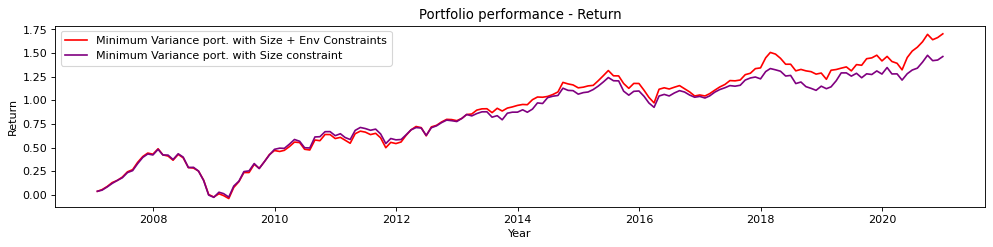

In [20]:
plt.figure(figsize = (15, 3), dpi = 80)
plt.plot(list(H1.df_returns_mv["timestamp"]), list(accumulate(returns_min_var_top_env)), color = "red", label = "Minimum Variance port. with Size + Env Constraints")
plt.plot(list(H1.df_returns_mv["timestamp"]), list(accumulate(H1.returns_min_var)), color = "purple", label = "Minimum Variance port. with Size constraint")
plt.xlabel("Year")
plt.ylabel("Return")
plt.title("Portfolio performance - Return")
plt.legend()
plt.show()

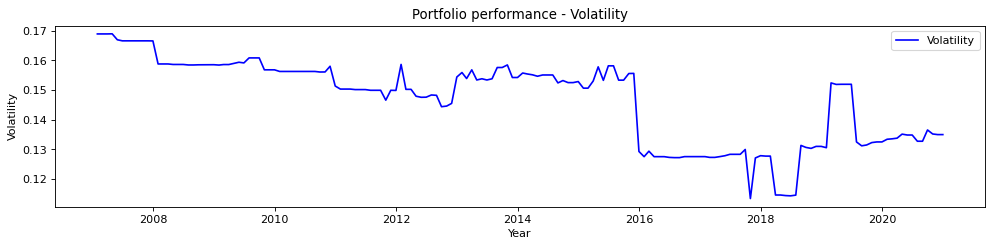

In [21]:
plt.figure(figsize = (15, 3), dpi = 80)
plt.plot(list(H1.df_returns_mv["timestamp"]), list(volatility_min_var_top), color = "blue", label = "Volatility")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.title("Portfolio performance - Volatility")
plt.legend()
plt.show()

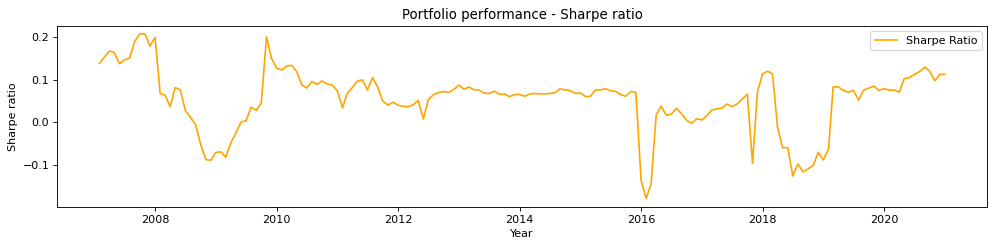

In [22]:
plt.figure(figsize = (15, 3), dpi = 80)
plt.plot(list(H1.df_returns_mv["timestamp"]), list(sharp_ratio_min_var_top), color = "orange", label = "Sharpe Ratio")
plt.xlabel("Year")
plt.ylabel("Sharpe ratio")
plt.title("Portfolio performance - Sharpe ratio")
plt.legend()
plt.show()

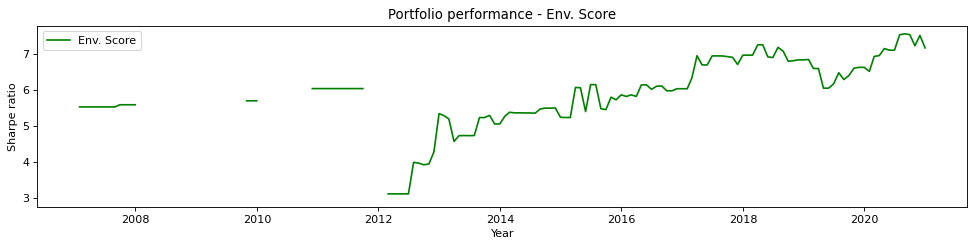

In [23]:
list_env_scores = [i if i !=0 else None for i in list(env_score_portfolio)]
plt.figure(figsize = (15, 3), dpi = 80)
plt.plot(list(H1.df_returns_mv["timestamp"]), list_env_scores, color = "green", label = "Env. Score")
#plt.plot(list(H1.df_returns_mv["timestamp"]), list(map(lambda x: x.replace(0, None), list(env_score_portfolio))), color = "green", label = "Env. Score")
plt.xlabel("Year")
plt.ylabel("Sharpe ratio")
plt.title("Portfolio performance - Env. Score")
plt.legend()
plt.show()

## Exercise 4

{0: 0.010253873423078479, 1: 0.012392527670914463, 2: 0.01134369897528813, 3: 0.012388358205773118, 4: 0.009810857419095018}
{0: 0.009471322311357503, 1: 0.011987830453109354, 2: 0.008721110763455357, 3: 0.009070840702769265, 4: 0.0073388994530048084}


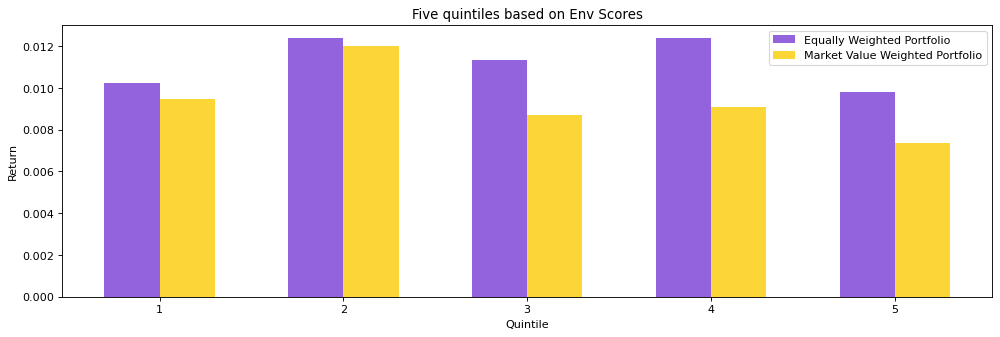

In [24]:
df_returns_chopped = H1.df_returns[-len(df_env_scores):].reset_index().drop(["index"], 1)
df_env_scores_ny = df_env_scores.drop("Year",1)

for month in range(1,len(df_env_scores_ny)):
    row_env = df_env_scores_ny.iloc[month-1].dropna().sort_values().keys()
    row_ret = df_returns_chopped.iloc[month].dropna().keys()
    row_size = H1.df_size.iloc[month-1].dropna().keys() 
    row = []
    for i in row_env:
        if i in row_ret and i in row_size: row.append(i)
    # Get the number of rows to divide into quintiles
    div = len(row)//5
    
    five_df_month = [row[:div], row[div:div*2], row[div*2:div*3], row[div*3:div*4], row[div*4:]]
    
    final_eq = {0:0, 1:0, 2:0, 3:0, 4:0}
    final_mv = {0:0, 1:0, 2:0, 3:0, 4:0}
    
    for quint in range(5):
        # Get the returns for that month
        ret = df_returns_chopped.iloc[month][five_df_month[quint]]
        
        ### Equally weighted portfolio ###
        weights_eq = np.array([1/len(five_df_month[quint])]*len(five_df_month[quint]))
        avg_ret_eq = np.average(ret, weights = weights_eq)
        
        ### Market-Value weighted portfolio ###
        weights_mv = H1.df_size.iloc[month-1][five_df_month[quint]]
        avg_ret_mv = np.average(ret, weights = weights_mv)
        
        final_eq[quint] += avg_ret_eq
        final_mv[quint] += avg_ret_mv

def final_quintiles(dictionary):
    for k,v in dictionary.items():
        dictionary[k] = (v/(len(df_env_scores_ny)-1))*12
    return dictionary

final_eq = final_quintiles(final_eq)
final_mv = final_quintiles(final_mv)


print(final_eq)
print(final_mv)

x, y = list(final_eq.values()), list(final_mv.values())
X_axis = list(range(1,6))

r = np.arange(5)
plt.figure(figsize = (15, 4.5), dpi = 80)
plt.bar(r, x, color = "#9263DD",width = 0.30, label = 'Equally Weighted Portfolio')
plt.bar(r + 0.30, y, color = '#FBD636', width = 0.30, label = 'Market Value Weighted Portfolio')
plt.xlabel("Quintile")
plt.ylabel("Return")
plt.title("Five quintiles based on Env Scores")
plt.xticks(r + 0.30/2, X_axis)
plt.legend()
plt.show()

In [25]:
# First quantile --> Low E score
# Last quantile --> High E score

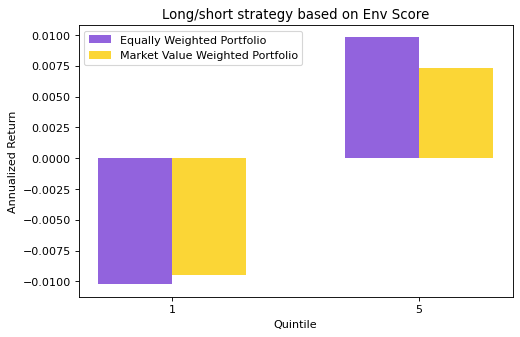

*** Equally Weighted Portfolio ***
Return of the strategy: -0.00044301600398346033

*** Market Value Weighted Portfolio ***
Return of the strategy: -0.0021324228583526946


In [26]:
ret_first_eq = final_eq[0]*-1
ret_last_eq = final_eq[4]

ret_first_mv = final_mv[0]*-1
ret_last_mv = final_mv[4]

X_axis = list(range(1,6,4))
r = np.arange(2)
plt.figure(figsize = (7, 4.5), dpi = 80)
plt.bar(r, [ret_first_eq, ret_last_eq,], color = "#9263DD", width = 0.30, label = 'Equally Weighted Portfolio')
plt.bar(r + 0.30, [ret_first_mv, ret_last_mv], color = '#FBD636', width = 0.30, label = 'Market Value Weighted Portfolio')
plt.xlabel("Quintile")
plt.ylabel("Annualized Return")
plt.title("Long/short strategy based on Env Score")
plt.xticks(r + 0.30/2, X_axis)
plt.legend()
plt.show()
print("*** Equally Weighted Portfolio ***")
print("Return of the strategy:", ret_first_eq + ret_last_eq)
print()
print("*** Market Value Weighted Portfolio ***")
print("Return of the strategy:", ret_first_mv + ret_last_mv)

In [27]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

df_env_scores_no_duplicates = df_env_scores.T.drop_duplicates().T
df_returns_no_duplicates = H1.df_returns.T.drop_duplicates().T

firms_list = intersection(list(H1.df_returns.keys()), list(df_env_scores_no_duplicates.keys())) 


mean_returns_list = df_returns_no_duplicates[firms_list].mean()
mean_env_score_list = df_env_scores_no_duplicates[firms_list].mean()

#slightly positive correlation
print("Correlation between avg return and avg env score:")
print(pearsonr(mean_returns_list, mean_env_score_list)[0])

Correlation between avg return and avg env score:
0.01742242023107285


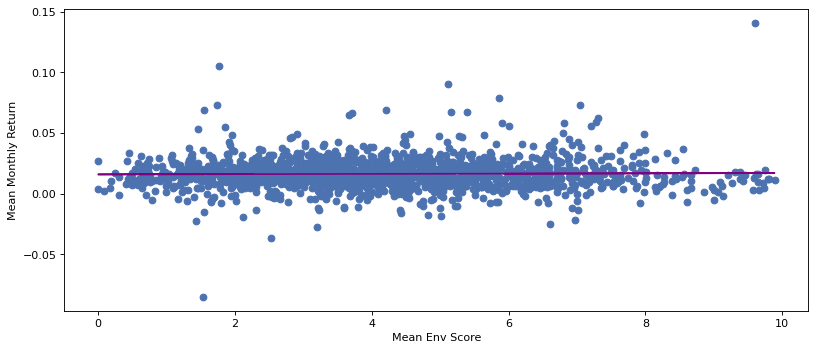

0.01585588369632004 0.00011057829178912223


In [28]:
b, a = np.polyfit(mean_env_score_list, mean_returns_list, deg=1)
plt.figure(figsize = (12, 5), dpi = 80)
plt.scatter(mean_env_score_list, mean_returns_list)
plt.plot(mean_env_score_list, a + b * mean_env_score_list, c = "purple", lw = 1.5)
plt.xlabel("Mean Env Score")
plt.ylabel("Mean Monthly Return")
plt.show()
print(a,b)

## Exercise 5

In [29]:
def increase_env_score(firms_name):
    # env scores and returns from desired firms
    global firms_env_scores
    firms_env_scores = df_env_scores_grouped.loc[2020][list(firms_name)].dropna().drop_duplicates()
    returns_min = fifty_random[firms_env_scores.keys()].drop_duplicates()
    
    # computing covariance matrix and weights for min portfolio
    cov = risk_models.CovarianceShrinkage(fifty_random[firms_env_scores.keys()], returns_data = True, frequency = 12).ledoit_wolf()
    ef = EfficientFrontier(returns_min.mean(), cov)
    weights = ef.min_volatility()
    global firms_weights
    firms_weights = weights.values()
    
    # computing env score and performance portfolio
    port_env_score = np.average(list(firms_env_scores), weights = list(firms_weights))
    performance_port = ef.portfolio_performance(True, risk_free_rate = H1.df_rf_mean)
    
    #returns env score of the portfolio
    return port_env_score

# ricreating same porfolio from H1 and setting new target
current_env_score = increase_env_score(list(firms))
target_env_score = current_env_score*1.2

# creating summary of portfolio based on weights of assets and their individual scores
df_increase20_perc = pd.DataFrame(None)
df_increase20_perc["firms"] = firms_env_scores.keys()
df_increase20_perc["weights"] = firms_weights
df_increase20_perc["env_score"] = list(firms_env_scores)
# sorting by those with worst env score
df_increase20_perc = df_increase20_perc.sort_values(["env_score", "weights"], ascending = [True, False])

# list of removed assets from initial portfolio
firms_removed = []

while target_env_score >= current_env_score:
    print()
    
    print("Target Env Score:",  target_env_score)
    print("Current Env Score:",  current_env_score)
    
    # removing asset with worst env score
    firms_removed.append(list(df_increase20_perc.firms)[0])
    df_increase20_perc = df_increase20_perc[1:]
    print()
    print("Number of companies: ", len(df_increase20_perc))
    print()
    print("***********************************************************************")
    # computing new min volatility portfolio with removed asset
    current_env_score = increase_env_score(df_increase20_perc.firms)

Expected annual return: 0.8%
Annual volatility: 10.6%
Sharpe Ratio: -0.04

Target Env Score: 4.660109765369464
Current Env Score: 3.883424804474554

Number of companies:  41

***********************************************************************
Expected annual return: 0.8%
Annual volatility: 10.8%
Sharpe Ratio: -0.04

Target Env Score: 4.660109765369464
Current Env Score: 4.1451378435274115

Number of companies:  40

***********************************************************************
Expected annual return: 0.8%
Annual volatility: 10.8%
Sharpe Ratio: -0.04

Target Env Score: 4.660109765369464
Current Env Score: 4.142534000406709

Number of companies:  39

***********************************************************************
Expected annual return: 0.9%
Annual volatility: 11.0%
Sharpe Ratio: -0.03

Target Env Score: 4.660109765369464
Current Env Score: 4.41979084651705

Number of companies:  38

***********************************************************************
Expected ann

In [30]:
comp_removed = pd.DataFrame(None)
for i in firms_removed:
    company_info = investpy.stocks.search_stocks(by = "isin", value = i).drop_duplicates()
    comp_removed = pd.concat([comp_removed, company_info])
    
comp_removed

,country,name,full_name,isin,currency,symbol
0,saudi arabia,SABB,The Saudi British Bank,SA0007879089,SAR,1060
0,india,Kotak Mahindra Bank,Kotak Mahindra Bank Ltd.,INE237A01028,INR,KTKM
0,india,Coal India,Coal India Ltd,INE522F01014,INR,COAL
0,china,Huaxi Securities A,Huaxi Securities Co Ltd Class A,CNE1000033J2,CNY,002926


### Optimizer method

In [31]:
def improved_env_score(month):
    
    list_firms = list(df_env_scores_fifty_random.iloc[month-1].dropna().keys())
    
    cov = risk_models.CovarianceShrinkage(fifty_random[list_firms].iloc[:month], returns_data = True, frequency = 12).ledoit_wolf()
    cov_matrix = np.asmatrix(cov)
    expected_r = np.asarray(np.mean(fifty_random[list_firms].iloc[:month]))
    actual_r = np.asarray(fifty_random[list_firms].iloc[month])

    env_score = np.asarray(df_env_scores_fifty_random[list_firms].iloc[month-1])
    
    # Number of variables
    n = len(cov_matrix)

    # The variables vector
    x = cp.Variable(n, nonneg  = True)

    # The minimum env score
    current_env_score = env_score.T*x

    # The return
    ret = expected_r.T*x

    # The risk in xT.Q.x format
    risk = cp.quad_form(x, cov_matrix)
    
    monthly_return = actual_r.T*x

    # replicating H1 portfolio - min volatility
    prob_min = cp.Problem(cp.Minimize(risk), [sum(x) == 1, x >= 0 , ret >= 0]) 
    prob_min.solve()
    weights_H1 = x.value
    expected_return_H1 = ret.value
    volatility_H1 = risk.value
    env_score_H1 = current_env_score.value
    monthly_return_H1 = monthly_return.value
    
    #computing the actual return of the portfolio
    
    # new portfolio with 1.2 times the env score
    target_env_score = env_score_H1 * 1.2
    
    prob_min_improved = cp.Problem(cp.Minimize(risk), [sum(x) == 1, x >= 0 , ret >= 0, current_env_score >= target_env_score])
    prob_min_improved.solve()
    weights_improved= x.value
    expected_return_improved = ret.value
    volatility_improved = risk.value
    env_score_improved = current_env_score.value
    
    if weights_improved is None:
        monthly_return_improved = monthly_return_H1
    else: 
        monthly_return_improved = monthly_return.value
        
    df_comparison = pd.DataFrame()
    df_comparison["isin"] = cov.columns
    df_comparison["weights_H1"] = weights_H1
    df_comparison["weights_improved_env"] = weights_improved
    
    return [[weights_H1, expected_return_H1, volatility_H1, env_score_H1, monthly_return_H1], [weights_improved, expected_return_improved, volatility_improved, env_score_improved, monthly_return_improved], df_comparison]  

In [32]:
H1_min_portfolio = []
improved_min_portfolio = []


# we skip first 7 months because we don't have any Env score at the beginning
for i in range(7,len(fifty_random)):
    results = improved_env_score(i)
    H1_min_portfolio.append(results[0])
    improved_min_portfolio.append(results[1])
    df_comparison = results[-1]
    
volatility_H1 = [i[2] for i in H1_min_portfolio]
volatility_improved = [i[2] for i in improved_min_portfolio]

returns_H1 = [i[4] for i in H1_min_portfolio]
returns_improved = [i[4] for i in improved_min_portfolio]

env_score_H1 = [i[3] for i in H1_min_portfolio]
env_score_improved = [i[3] for i in improved_min_portfolio]

df_removed_added = df_comparison.loc[((df_comparison["weights_H1"] == 0) | (df_comparison["weights_improved_env"] == 0.) )]
df_info = pd.DataFrame()
for i in df_removed_added["isin"]:
    try:
        company_info = investpy.stocks.search_stocks(by = "isin", value = i).drop_duplicates()
        df_info = pd.concat([df_info, company_info])
    except:
        continue
    
df_removed_added_merged = pd.merge(df_removed_added, df_info)
df_removed_added_merged.drop([6,8,9])

,isin,weights_H1,weights_improved_env,country,name,full_name,currency,symbol
0,CNE0000011P7,0.000000e+00,1.918594e-23,china,Zhongnan Cons A,Jiangsu Zhongnan Construction Group Co Ltd,CNY,000961
1,CNE100000BJ4,9.744346e-25,0.000000e+00,china,Dahua Tech A,Zhejiang Dahua Technology Co Ltd,CNY,002236
2,ZAE000255915,0.000000e+00,3.527863e-23,south africa,Absa,Absa Group Ltd,ZAR,ABGJ
3,KR7010060002,0.000000e+00,1.129075e-22,south korea,OCI Co,OCI Co Ltd,KRW,010060
4,KR7051600005,0.000000e+00,1.192982e-02,south korea,Kepco Plant S&,Kepco Plant S&,KRW,051600
5,CNE000001B66,4.282893e-25,0.000000e+00,china,Jiangsu Yangnong Chemical,Jiangsu Yangnong Chemical Co Ltd,CNY,600486
7,KR7005380001,5.635056e-24,0.000000e+00,south korea,Hyundai Motor,Hyundai Motor,KRW,005380


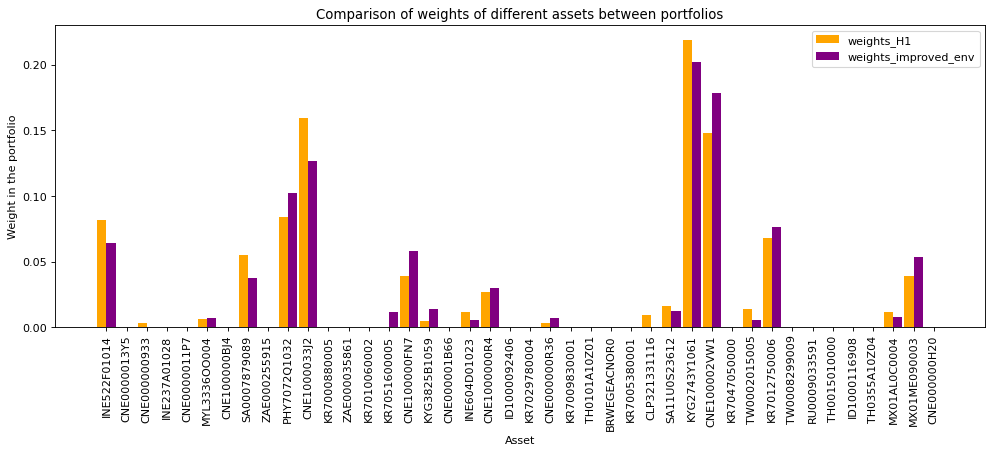

In [58]:
df_comparison
plt.figure(figsize = (15, 5), dpi = 80)

n=len(df_comparison['isin'])
r = np.arange(n)
width = 0.45

plt.bar(r, df_comparison["weights_H1"], color = 'orange', width = width, label='weights_H1')
plt.bar(r + width, df_comparison["weights_improved_env"], color = 'purple',
        width = width,
        label='weights_improved_env')
                                
plt.xticks(r + width/2,df_comparison['isin'], rotation = 90)
plt.title("Comparison of weights of different assets between portfolios")
plt.xlabel("Asset")
plt.ylabel("Weight in the portfolio")
plt.legend()
plt.show()

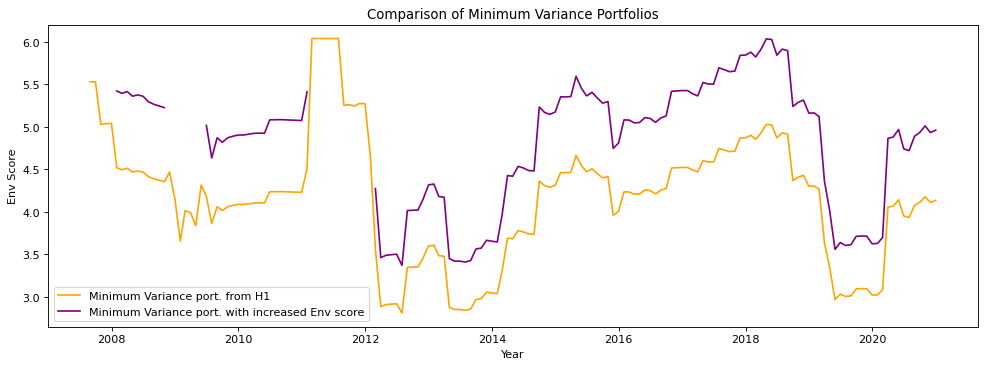

In [33]:
plt.figure(figsize = (15, 5), dpi = 80)
plt.plot(list(H1.df_returns_mv["timestamp"][-len(volatility_H1):]), env_score_H1, color = "orange", label = "Minimum Variance port. from H1")
plt.plot(list(H1.df_returns_mv["timestamp"][-len(volatility_improved):]), env_score_improved, color = "purple", label = "Minimum Variance port. with increased Env score")
plt.xlabel("Year")
plt.ylabel("Env Score")
plt.title("Comparison of Minimum Variance Portfolios")
plt.legend()
plt.show()

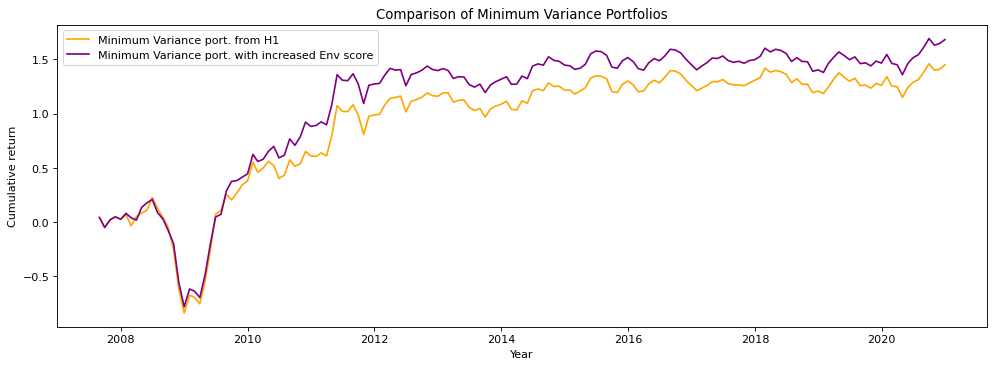

In [34]:
plt.figure(figsize = (15, 5), dpi = 80)
plt.plot(list(H1.df_returns_mv["timestamp"][-len(volatility_H1):]), list(accumulate(returns_H1)), color = "orange", label = "Minimum Variance port. from H1")
plt.plot(list(H1.df_returns_mv["timestamp"][-len(volatility_improved):]), list(accumulate(returns_improved)), color = "purple", label = "Minimum Variance port. with increased Env score")
plt.xlabel("Year")
plt.ylabel("Cumulative return")
plt.title("Comparison of Minimum Variance Portfolios")
plt.legend()
plt.show()

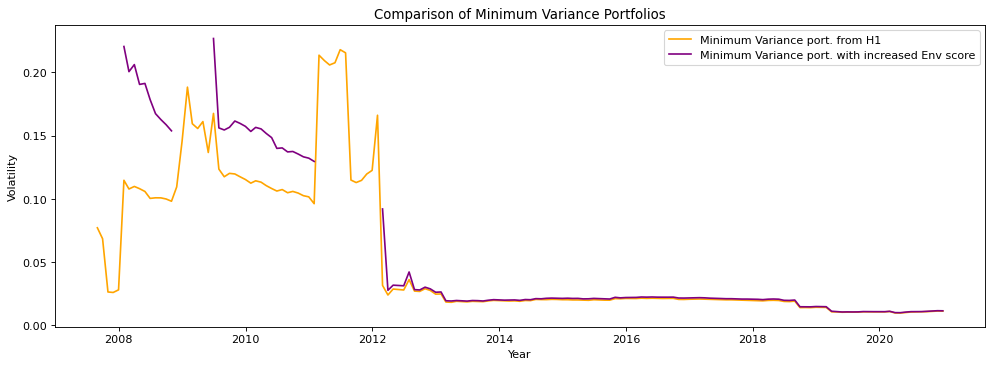

In [35]:
plt.figure(figsize = (15, 5), dpi = 80)
plt.plot(list(H1.df_returns_mv["timestamp"][-len(volatility_H1):]), volatility_H1, color = "orange", label = "Minimum Variance port. from H1")
plt.plot(list(H1.df_returns_mv["timestamp"][-len(volatility_improved):]), volatility_improved, color = "purple", label = "Minimum Variance port. with increased Env score")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.title("Comparison of Minimum Variance Portfolios")
plt.legend()
plt.show()